In [1]:
import math
import collections
import csv
import re
import numpy as np
from matplotlib import pyplot as plt
from pandas import Series
from pandas import DataFrame
import pandas as pd

# Preprocessing:
# Part 1
germanFile = open("GermanCredit.csv")
credit = pd.read_csv(germanFile)
credit # Let's check out this table

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking',12,'existing paid',furniture/equipment,1736,'<100','4<=X<7',3,'female div/dep/mar',none,...,'real estate',31,none,own,1,'unskilled resident',1,none,yes,good
996,'<0',30,'existing paid','used car',3857,'<100','1<=X<4',4,'male div/sep',none,...,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
997,'no checking',12,'existing paid',radio/tv,804,'<100','>=7',4,'male single',none,...,car,38,none,own,1,skilled,1,none,yes,good
998,'<0',45,'existing paid',radio/tv,1845,'<100','1<=X<4',4,'male single',none,...,'no known property',23,none,'for free',1,skilled,1,yes,yes,bad


In [2]:
highestNone = {} # Create the dictionary we need

In [3]:
for (columnName, columnData) in credit.iteritems(): # There could be an easier way to do this, but here's what I came up with.
    try: # We'll try to count all the "none" in the column that is currently being checked.
        highestNone[columnName] = credit[columnName].value_counts()['none'].item() # Put the colunn name as key with the value as the amount of "none"
    except KeyError: # If there are no "none", we usually get an error so let's catch it.
        pass
highestNone

{'other_parties': 907, 'other_payment_plans': 814, 'own_telephone': 596}

In [4]:
highestNone = sorted(highestNone.items(), key=lambda x: x[1], reverse=True) # Sort them just in case
highestNone

[('other_parties', 907), ('other_payment_plans', 814), ('own_telephone', 596)]

In [5]:
list(highestNone)[0][0] # This is what we get to extract the column name

'other_parties'

In [6]:
def deleteColumns(noneList, n): # This function will take n and delete all the columns that are redundant up to n times.
    for i in range(n):
        del credit[list(highestNone)[i][0]]
        print(list(highestNone)[i][0])

In [7]:
deleteColumns(highestNone, n=3) # Function example. You can customize n.

other_parties
other_payment_plans
own_telephone


In [8]:
credit # Check list again.

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',4,'real estate',67,own,2,skilled,1,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',2,'real estate',22,own,1,skilled,1,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',3,'real estate',49,own,1,'unskilled resident',2,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',4,'life insurance',45,'for free',1,skilled,2,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',4,'no known property',53,'for free',2,skilled,2,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking',12,'existing paid',furniture/equipment,1736,'<100','4<=X<7',3,'female div/dep/mar',4,'real estate',31,own,1,'unskilled resident',1,yes,good
996,'<0',30,'existing paid','used car',3857,'<100','1<=X<4',4,'male div/sep',4,'life insurance',40,own,1,'high qualif/self emp/mgmt',1,yes,good
997,'no checking',12,'existing paid',radio/tv,804,'<100','>=7',4,'male single',4,car,38,own,1,skilled,1,yes,good
998,'<0',45,'existing paid',radio/tv,1845,'<100','1<=X<4',4,'male single',4,'no known property',23,'for free',1,skilled,1,yes,bad


In [9]:
# Part 2
# Certain values have apostrophes('). Get rid of these.
credit.replace('\'','', regex=True, inplace=True) # Simple replacing

In [10]:
credit.head(50)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad
5,no checking,36,existing paid,education,9055,no known savings,1<=X<4,2,male single,4,no known property,35,for free,1,unskilled resident,2,yes,good
6,no checking,24,existing paid,furniture/equipment,2835,500<=X<1000,>=7,3,male single,4,life insurance,53,own,1,skilled,1,yes,good
7,0<=X<200,36,existing paid,used car,6948,<100,1<=X<4,2,male single,2,car,35,rent,1,high qualif/self emp/mgmt,1,yes,good
8,no checking,12,existing paid,radio/tv,3059,>=1000,4<=X<7,2,male div/sep,4,real estate,61,own,1,unskilled resident,1,yes,good
9,0<=X<200,30,critical/other existing credit,new car,5234,<100,unemployed,4,male mar/wid,2,car,28,own,2,high qualif/self emp/mgmt,1,yes,bad


In [11]:
# Part 3
# The checking_status column has values in 4 categories: 'no checking', '<0', '0<=X<200', and '>=200'. 
# Change these to 'No Checking', 'Low', 'Medium', and 'High' respectively.
# We just need to replace the sepcific string at checking status.
credit['checking_status'] = credit['checking_status'].str.replace('no checking','No Checking')
credit['checking_status'] = credit['checking_status'].str.replace('<0','Low')
credit['checking_status'] = credit['checking_status'].str.replace('0<=X<200','Medium')
credit['checking_status'] = credit['checking_status'].str.replace('>=200','High')
credit.head(50) 

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,Medium,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,No Checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,Low,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,Low,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad
5,No Checking,36,existing paid,education,9055,no known savings,1<=X<4,2,male single,4,no known property,35,for free,1,unskilled resident,2,yes,good
6,No Checking,24,existing paid,furniture/equipment,2835,500<=X<1000,>=7,3,male single,4,life insurance,53,own,1,skilled,1,yes,good
7,Medium,36,existing paid,used car,6948,<100,1<=X<4,2,male single,2,car,35,rent,1,high qualif/self emp/mgmt,1,yes,good
8,No Checking,12,existing paid,radio/tv,3059,>=1000,4<=X<7,2,male div/sep,4,real estate,61,own,1,unskilled resident,1,yes,good
9,Medium,30,critical/other existing credit,new car,5234,<100,unemployed,4,male mar/wid,2,car,28,own,2,high qualif/self emp/mgmt,1,yes,bad


In [12]:
# Part 4
# The savings_status column has values in 4 categories: 'no known savings', '<100', '100<=X<500', '500<=X<1000', and '>=1000'. 
# Change these to 'No Savings', 'Low', 'Medium', 'High', and 'High' respectively. (Yes, the last two are both 'High')
# Same thing as before.
credit['savings_status'] = credit['savings_status'].str.replace('>=1000','High')
credit['savings_status'] = credit['savings_status'].str.replace('500<=X<1000','High')
credit['savings_status'] = credit['savings_status'].str.replace('100<=X<500','Medium')
credit['savings_status'] = credit['savings_status'].str.replace('<100','Low')
credit['savings_status'] = credit['savings_status'].str.replace('no known savings','No Savings')
# We're going in reverse order because of an error in displaying.
# <100 would affect '500<=X<1000' as 500<=XLow0.

In [13]:
credit.head(50)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,good
1,Medium,48,existing paid,radio/tv,5951,Low,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,bad
2,No Checking,12,critical/other existing credit,education,2096,Low,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,good
3,Low,42,existing paid,furniture/equipment,7882,Low,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,good
4,Low,24,delayed previously,new car,4870,Low,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,bad
5,No Checking,36,existing paid,education,9055,No Savings,1<=X<4,2,male single,4,no known property,35,for free,1,unskilled resident,2,yes,good
6,No Checking,24,existing paid,furniture/equipment,2835,High,>=7,3,male single,4,life insurance,53,own,1,skilled,1,yes,good
7,Medium,36,existing paid,used car,6948,Low,1<=X<4,2,male single,2,car,35,rent,1,high qualif/self emp/mgmt,1,yes,good
8,No Checking,12,existing paid,radio/tv,3059,High,4<=X<7,2,male div/sep,4,real estate,61,own,1,unskilled resident,1,yes,good
9,Medium,30,critical/other existing credit,new car,5234,Low,unemployed,4,male mar/wid,2,car,28,own,2,high qualif/self emp/mgmt,1,yes,bad


In [14]:
# Part 5
# Change the class column values from 'good' to 1 and 'bad' to 0.
# Simple replacing.
credit['class'] = credit['class'].str.replace('good','1')
credit['class'] = credit['class'].str.replace('bad','0')

In [15]:
credit.head(50)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,>=7,4,male single,4,real estate,67,own,2,skilled,1,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,1<=X<4,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,4<=X<7,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,4<=X<7,2,male single,4,life insurance,45,for free,1,skilled,2,yes,1
4,Low,24,delayed previously,new car,4870,Low,1<=X<4,3,male single,4,no known property,53,for free,2,skilled,2,yes,0
5,No Checking,36,existing paid,education,9055,No Savings,1<=X<4,2,male single,4,no known property,35,for free,1,unskilled resident,2,yes,1
6,No Checking,24,existing paid,furniture/equipment,2835,High,>=7,3,male single,4,life insurance,53,own,1,skilled,1,yes,1
7,Medium,36,existing paid,used car,6948,Low,1<=X<4,2,male single,2,car,35,rent,1,high qualif/self emp/mgmt,1,yes,1
8,No Checking,12,existing paid,radio/tv,3059,High,4<=X<7,2,male div/sep,4,real estate,61,own,1,unskilled resident,1,yes,1
9,Medium,30,critical/other existing credit,new car,5234,Low,unemployed,4,male mar/wid,2,car,28,own,2,high qualif/self emp/mgmt,1,yes,0


In [16]:
# Part 6
# Change the employment column value 'unemployed' to 'Unemployed', and for the others, change to 'Amateur', 'Professional', 'Experienced' and 'Expert', 
# depending on year range.
# Similar to the previous parts.
credit['employment'] = credit['employment'].str.replace('>=7','Expert')
credit['employment'] = credit['employment'].str.replace('4<=X<7','Experienced')
credit['employment'] = credit['employment'].str.replace('1<=X<4','Professional')
credit['employment'] = credit['employment'].str.replace('<1','Amateur')
credit['employment'] = credit['employment'].str.replace('unemployed','Unemployed')

In [17]:
credit.head(50)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,housing,existing_credits,job,num_dependents,foreign_worker,class
0,Low,6,critical/other existing credit,radio/tv,1169,No Savings,Expert,4,male single,4,real estate,67,own,2,skilled,1,yes,1
1,Medium,48,existing paid,radio/tv,5951,Low,Professional,2,female div/dep/mar,2,real estate,22,own,1,skilled,1,yes,0
2,No Checking,12,critical/other existing credit,education,2096,Low,Experienced,2,male single,3,real estate,49,own,1,unskilled resident,2,yes,1
3,Low,42,existing paid,furniture/equipment,7882,Low,Experienced,2,male single,4,life insurance,45,for free,1,skilled,2,yes,1
4,Low,24,delayed previously,new car,4870,Low,Professional,3,male single,4,no known property,53,for free,2,skilled,2,yes,0
5,No Checking,36,existing paid,education,9055,No Savings,Professional,2,male single,4,no known property,35,for free,1,unskilled resident,2,yes,1
6,No Checking,24,existing paid,furniture/equipment,2835,High,Expert,3,male single,4,life insurance,53,own,1,skilled,1,yes,1
7,Medium,36,existing paid,used car,6948,Low,Professional,2,male single,2,car,35,rent,1,high qualif/self emp/mgmt,1,yes,1
8,No Checking,12,existing paid,radio/tv,3059,High,Experienced,2,male div/sep,4,real estate,61,own,1,unskilled resident,1,yes,1
9,Medium,30,critical/other existing credit,new car,5234,Low,Unemployed,4,male mar/wid,2,car,28,own,2,high qualif/self emp/mgmt,1,yes,0


In [18]:
# Analysis:
# Part 1:
# A good way to find such counts is to use the Pandas crosstab function. Do this for the following two counts.
# Part a
# Get the count of each category of foreign workers (yes and no) for each class of credit (good and bad)

pd.crosstab(credit.foreign_worker, credit['class']).reset_index() # Use crosstab to get these tables.

class,foreign_worker,0,1
0,no,4,33
1,yes,296,667


In [19]:
# Part b
# Similarly, get the count of each category of employment for each category of saving_status.
pd.crosstab(credit.employment, credit.savings_status).reset_index() # Don't know if they wanted it in proper order, but this is the answer so they gotta accept it.

savings_status,employment,High,Low,Medium,No Savings
0,Amateur,12,120,17,23
1,Experienced,18,100,24,32
2,Expert,34,133,22,64
3,Professional,44,210,33,52
4,Unemployed,3,40,7,12


In [20]:
# Part 2
# Find the average credit_amount of single males that have 4<=X<7 years of employment. 
# You can leave the raw result as is, no need for rounding.
maleSubset = credit[['credit_amount','employment','personal_status']] # Create subset table
maleSubset

,credit_amount,employment,personal_status
0,1169,Expert,male single
1,5951,Professional,female div/dep/mar
2,2096,Experienced,male single
3,7882,Experienced,male single
4,4870,Professional,male single
...,...,...,...
995,1736,Experienced,female div/dep/mar
996,3857,Professional,male div/sep
997,804,Expert,male single
998,1845,Professional,male single


In [21]:
newMaleSubset = maleSubset[(maleSubset['employment'] == 'Experienced') & (maleSubset['personal_status'] == 'male single')] # Extract the specific instructions.
newMaleSubset 

,credit_amount,employment,personal_status
2,2096,Experienced,male single
3,7882,Experienced,male single
77,4771,Experienced,male single
88,2249,Experienced,male single
89,1108,Experienced,male single
...,...,...,...
942,929,Experienced,male single
943,1455,Experienced,male single
951,2145,Experienced,male single
980,8386,Experienced,male single


In [22]:
newMaleSubset['credit_amount'].mean() # Grab the mean of the new table.

4142.592592592592

In [23]:
# Part 3
# Find the average credit duration for each of the job types. 
# You can leave the raw result as is, no need for rounding.
durationSubset = credit[['duration','job']] # Grab the subset.
durationSubset

,duration,job
0,6,skilled
1,48,skilled
2,12,unskilled resident
3,42,skilled
4,24,skilled
...,...,...
995,12,unskilled resident
996,30,high qualif/self emp/mgmt
997,12,skilled
998,45,skilled


In [24]:
newDurationSubset = durationSubset.groupby('job')['duration'].mean().reset_index() # Group jobs together with the mean of their duration.
newDurationSubset

,job,duration
0,high qualif/self emp/mgmt,25.168919
1,skilled,21.411111
2,unemp/unskilled non res,17.363636
3,unskilled resident,16.535000


In [25]:
# Part 4
# For the purpose 'education', what is the most common checking_status and savings_status? Your code should print:
#    Most common checking status: ...
#    Most common savings status: ...
savingCheckingSub = credit[['checking_status','savings_status']] # Get the subset data
savingCheckingSub

,checking_status,savings_status
0,Low,No Savings
1,Medium,Low
2,No Checking,Low
3,Low,Low
4,Low,Low
...,...,...
995,No Checking,Low
996,Low,Low
997,No Checking,Low
998,Low,Low


In [26]:
checkingAns = savingCheckingSub['checking_status'].mode()[0] # Mode will extract the frequent value in each column that we specify.
savingAns = savingCheckingSub['savings_status'].mode()[0]

print(f'Most common checking status: {checkingAns}')
print(f'Most common savings status: {savingAns}')

Most common checking status: No Checking
Most common savings status: Low


In [27]:
# Visualization:
# Part 1

In [28]:
# Isolate the needed data
savingsSubset = credit.groupby(['savings_status','personal_status']).count().reset_index()
checkingSubset = credit.groupby(['checking_status','personal_status']).count().reset_index()

In [29]:
# Create tables for every single personal status matching to savings and checking.
savingsSubset1 = savingsSubset[(savingsSubset['personal_status'] == 'female div/dep/mar')]
savingsSubset2 = savingsSubset[(savingsSubset['personal_status'] == 'male div/sep')]
savingsSubset3 = savingsSubset[(savingsSubset['personal_status'] == 'male mar/wid')]
savingsSubset4 = savingsSubset[(savingsSubset['personal_status'] == 'male single')]
checkingSubset1 = checkingSubset[(checkingSubset['personal_status'] == 'female div/dep/mar')]
checkingSubset2 = checkingSubset[(checkingSubset['personal_status'] == 'male div/sep')]
checkingSubset3 = checkingSubset[(checkingSubset['personal_status'] == 'male mar/wid')]
checkingSubset4 = checkingSubset[(checkingSubset['personal_status'] == 'male single')]

In [30]:
# Needed data for the x axis of the graphs
j = savingsSubset['savings_status'].unique()
k = checkingSubset['checking_status'].unique()

In [31]:
jaxis = np.arange(len(j))

In [32]:
kaxis = np.arange(len(k))

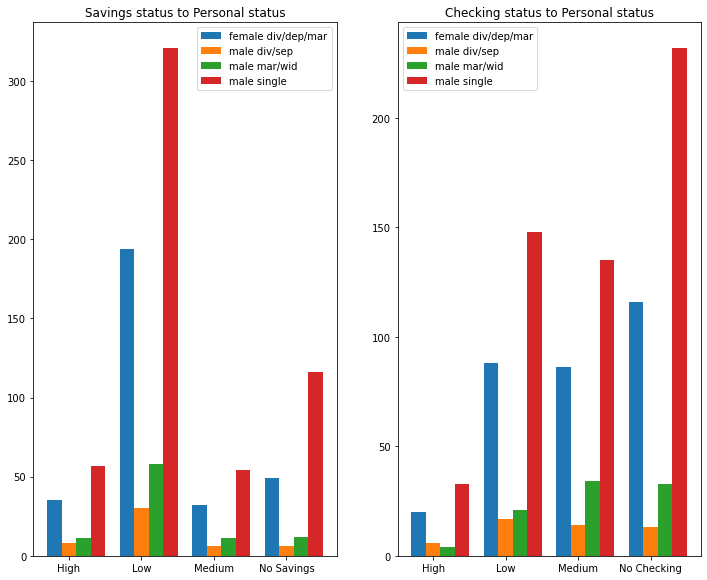

In [33]:
# Begin constructing the graph
fig, axes = plt.subplots(1,2,figsize=(10,8))
fig.tight_layout(h_pad=5.0,w_pad=3.0)

# first figure for saving status
axes[0].bar(jaxis-0.2,savingsSubset1['checking_status'].values, width = 0.2, label='female div/dep/mar')
axes[0].bar(jaxis+0.0,savingsSubset2['checking_status'].values, width = 0.2, label='male div/sep')
axes[0].bar(jaxis+0.2,savingsSubset3['checking_status'].values, width = 0.2, label='male mar/wid')
axes[0].bar(jaxis+0.4,savingsSubset4['checking_status'].values, width = 0.2, label='male single')
axes[0].set_title('Savings status to Personal status')
plt.sca(axes[0])
plt.xticks(jaxis, ['High', 'Low', 'Medium', 'No Savings'])
axes[0].legend()

# second figure for checking status
axes[1].bar(jaxis-0.2,checkingSubset1['savings_status'].values, width = 0.2, label='female div/dep/mar')
axes[1].bar(jaxis+0.0,checkingSubset2['savings_status'].values, width = 0.2, label='male div/sep')
axes[1].bar(jaxis+0.2,checkingSubset3['savings_status'].values, width = 0.2, label='male mar/wid')
axes[1].bar(jaxis+0.4,checkingSubset4['savings_status'].values, width = 0.2, label='male single')
axes[1].set_title('Checking status to Personal status')
plt.sca(axes[1])
plt.xticks(jaxis, ['High', 'Low', 'Medium', 'No Checking'])
axes[1].legend()

plt.show()

In [34]:
# Part 2
# Extract the specific instructions.
creditSubset = credit[(credit['credit_amount'] > 4000)]

In [35]:
# property_magnitude (x-axis) to the average customer age for that magnitude (y-axis)
mag = creditSubset['property_magnitude'].unique()

In [36]:
mag2 = creditSubset.groupby('property_magnitude')['age'].mean().reset_index()

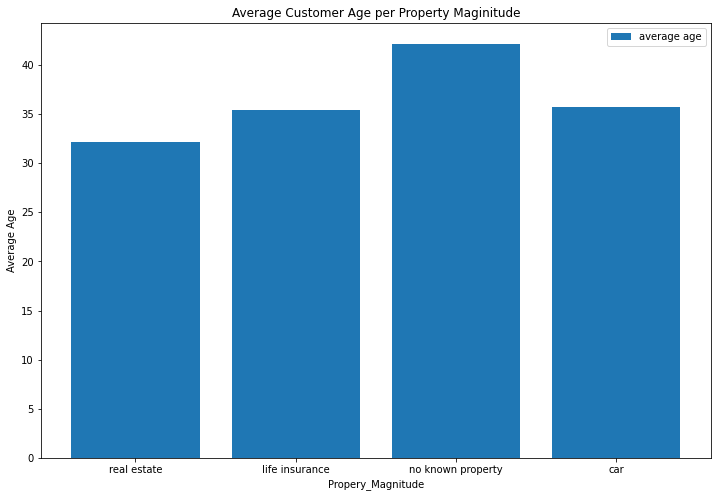

In [37]:
# Create the bar graph based on attributes.
plt.figure(figsize=(12,8))
plt.bar(mag, mag2['age'], label='average age')
plt.xlabel('Propery_Magnitude')
plt.ylabel('Average Age')
plt.title('Average Customer Age per Property Maginitude')
plt.legend()
plt.show()

In [38]:
# Part 3
# First we're gonna make the subset frame for the charts.
pieSubset = credit[(credit['savings_status'] == 'High') & (credit['age'] > 40)] # Extract the specific instructions.

In [39]:
# Count the values for every value in the respective columns.
personalNameCount = pieSubset['personal_status'].value_counts()
creditHistoryCount = pieSubset['credit_history'].value_counts()
jobCount = pieSubset['job'].value_counts()

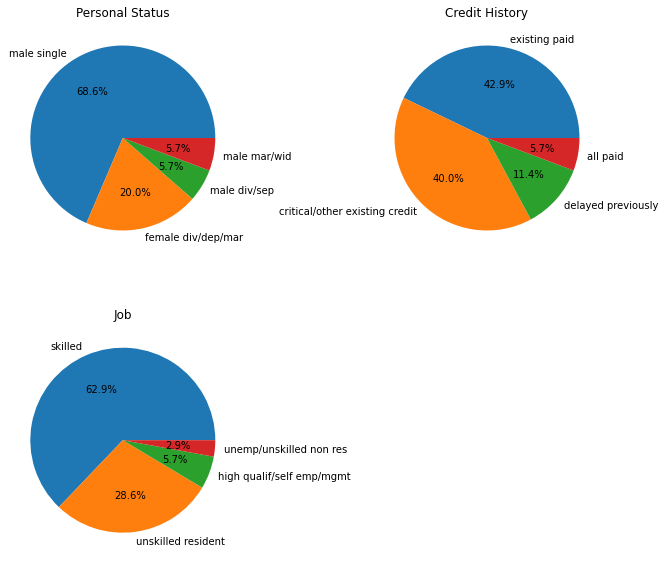

In [41]:
# Begin the graph creation.
fig, axes = plt.subplots(2,2,figsize=(10,8))
fig.tight_layout(h_pad=5.0,w_pad=3.0)

# first figure for personal status
axes[0][0].pie(personalNameCount.values,labels=personalNameCount.index,
                autopct='%1.1f%%')
axes[0][0].set_title('Personal Status')

# second figure for credit history
axes[0][1].pie(creditHistoryCount.values,labels=creditHistoryCount.index,
              autopct='%1.1f%%')
axes[0][1].set_title('Credit History')

# third figure for Job
axes[1][0].pie(jobCount.values,labels=jobCount.index,
              autopct='%1.1f%%')
axes[1][0].set_title('Job')

# last subplot unused, turn it off
axes[1][1].set_axis_off()